# Atividade Final 
* > objetivo da atividade e analisar o consumo de energia elétrica no Brasil ao longo dos anos

* Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

# Importação bibliateca de funções
from src.data_visulization.visualization import *
from src.data_visulization.grafico import *
from src.data_cleaning.cleaning import drop_duplicados, limpa_dados_NAN

#### Carregamento dos dataset

In [2]:
df_consumo_energia = pd.read_csv("../data/consumo_energia_eletrica.csv", sep=',')
df_estados = pd.read_csv("../data/estado_regiao.csv", sep=';', encoding='ISO-8859-1')

In [3]:
df_consumo_energia

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo
0,2004,1,TO,Total,NaN,65876
1,2004,1,BA,Total,NaN,1444451
2,2004,1,PR,Total,NaN,1596274
3,2004,1,RS,Total,NaN,1780912
4,2004,1,GO,Total,NaN,630624
...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461
39893,2023,12,PA,Residencial,2614106.0,478726
39894,2023,12,AC,Residencial,245699.0,58301
39895,2023,12,RN,Residencial,1390080.0,210119


In [4]:
df_estados.head()

,id_estado,sigla,estado,regiao,pais
0,1,AC,Acre,Norte,Brasil
1,2,AL,Alagoas,Nordeste,Brasil
2,3,AP,Amapá,Norte,Brasil
3,4,AM,Amazonas,Norte,Brasil
4,5,BA,Bahia,Nordeste,Brasil


* Realização de união dos dataset com a função merge

In [5]:
df_final = pd.merge(df_consumo_energia, df_estados, left_on='sigla_uf', right_on='sigla')

* exclusão coluna com redundância

In [6]:
df_final.drop(columns='sigla', inplace=True)


In [7]:
df_final.head(10)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
0,2004,1,TO,Total,NaN,65876,27,Tocantins,Norte,Brasil
1,2004,1,BA,Total,NaN,1444451,5,Bahia,Nordeste,Brasil
2,2004,1,PR,Total,NaN,1596274,16,Paraná,Sul,Brasil
3,2004,1,RS,Total,NaN,1780912,21,Rio Grande do Sul,Sul,Brasil
4,2004,1,GO,Total,NaN,630624,9,Goiás,Centro-Oeste,Brasil
5,2004,1,MA,Total,NaN,737033,10,Maranhão,Nordeste,Brasil
6,2004,1,PI,Total,NaN,131052,18,Piauí,Nordeste,Brasil
7,2004,1,RO,Total,NaN,112812,22,Rondônia,Norte,Brasil
8,2004,1,DF,Total,NaN,311459,7,Distrito Federal,Centro-Oeste,Brasil
9,2004,1,SE,Total,NaN,192207,26,Sergipe,Nordeste,Brasil


#### Limpeza e tratamento dos dados

In [8]:
df_final.shape

(39897, 10)

In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39897 entries, 0 to 39896
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ano                  39897 non-null  int64  
 1   mes                  39897 non-null  int64  
 2   sigla_uf             39897 non-null  object 
 3   tipo_consumo         39897 non-null  object 
 4   numero_consumidores  26937 non-null  float64
 5   consumo              39897 non-null  int64  
 6   id_estado            39897 non-null  int64  
 7   estado               39897 non-null  object 
 8   regiao               39897 non-null  object 
 9   pais                 39897 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 3.0+ MB


* De acordo com as instruções dos enunciado da atividade
> Instruções para correção de dados ausentes  
> Exclua todos os dados ausentes. 

In [10]:
# importação e utilização de função importada de modulo
limpa_dados_NAN(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


* Tratamento dos dados duplicados 

In [11]:
visuliza_duplicados(df_final, subset=['consumo', 'ano', 'mes', 'tipo_consumo'])

Existem 1017 registros duplicados.


,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
38880,2023,11,MS,Outros,99710.0,122350,12,Mato Grosso do Sul,Centro-Oeste,Brasil
38881,2023,11,RN,Outros,77359.0,112767,20,Rio Grande do Norte,Nordeste,Brasil
38882,2023,11,PE,Outros,157848.0,256509,17,Pernambuco,Nordeste,Brasil
38883,2023,11,ES,Outros,234985.0,180315,8,Espírito Santo,Sudeste,Brasil
38884,2023,11,AC,Outros,23068.0,26323,1,Acre,Norte,Brasil
...,...,...,...,...,...,...,...,...,...,...
39892,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
39893,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
39894,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
39895,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [12]:
# Irei optar por realizar exclusão dos dados duplicados
drop_duplicados(df_final)

,ano,mes,sigla_uf,tipo_consumo,numero_consumidores,consumo,id_estado,estado,regiao,pais
648,2004,1,RN,Outros,40857.0,69617,20,Rio Grande do Norte,Nordeste,Brasil
649,2004,1,SP,Outros,311650.0,937538,25,São Paulo,Sudeste,Brasil
650,2004,1,MS,Outros,56881.0,67601,12,Mato Grosso do Sul,Centro-Oeste,Brasil
651,2004,1,SC,Outros,226165.0,209380,24,Santa Catarina,Sul,Brasil
652,2004,1,RJ,Outros,70634.0,416128,19,Rio de Janeiro,Sudeste,Brasil
...,...,...,...,...,...,...,...,...,...,...
38875,2023,12,BA,Residencial,5932740.0,718461,5,Bahia,Nordeste,Brasil
38876,2023,12,PA,Residencial,2614106.0,478726,14,Pará,Norte,Brasil
38877,2023,12,AC,Residencial,245699.0,58301,1,Acre,Norte,Brasil
38878,2023,12,RN,Residencial,1390080.0,210119,20,Rio Grande do Norte,Nordeste,Brasil


In [13]:
agrupamento_ano = df_final['ano'].value_counts()
agrupamento_ano

ano
2004    1296
2005    1296
2022    1296
2021    1296
2020    1296
2019    1296
2018    1296
2017    1296
2016    1296
2015    1296
2014    1296
2013    1296
2012    1296
2011    1296
2010    1296
2009    1296
2008    1296
2007    1296
2006    1296
2023    1296
Name: count, dtype: int64

In [14]:
agrupamento_consumo = df_final['tipo_consumo'].value_counts()
agrupamento_consumo

tipo_consumo
Outros         6480
Comercial      6480
Industrial     6480
Residencial    6480
Name: count, dtype: int64

* Avaliação das correlações entre os atributos


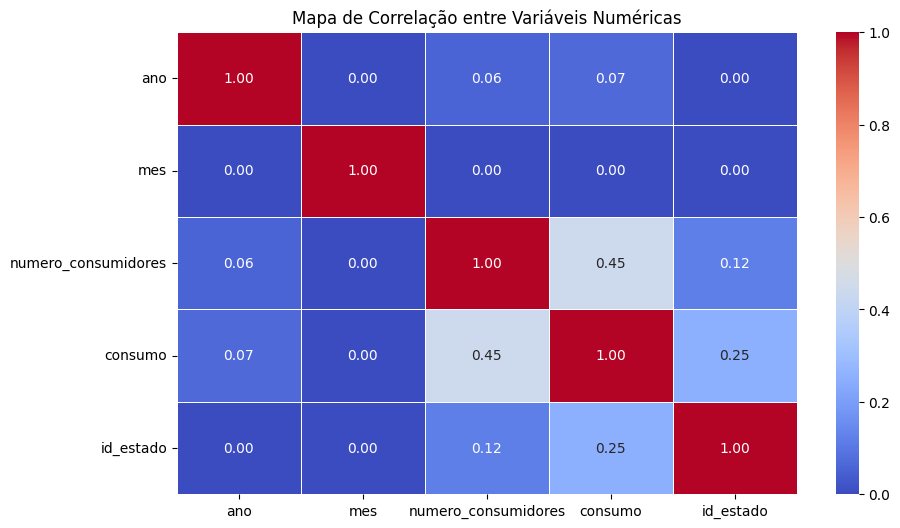

In [15]:
correlacao = df_final.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

#### Analises com base no dataset

1º Evolução do consumo total por ano (nacional)
→ Gráfico de linha do consumo total por ano.

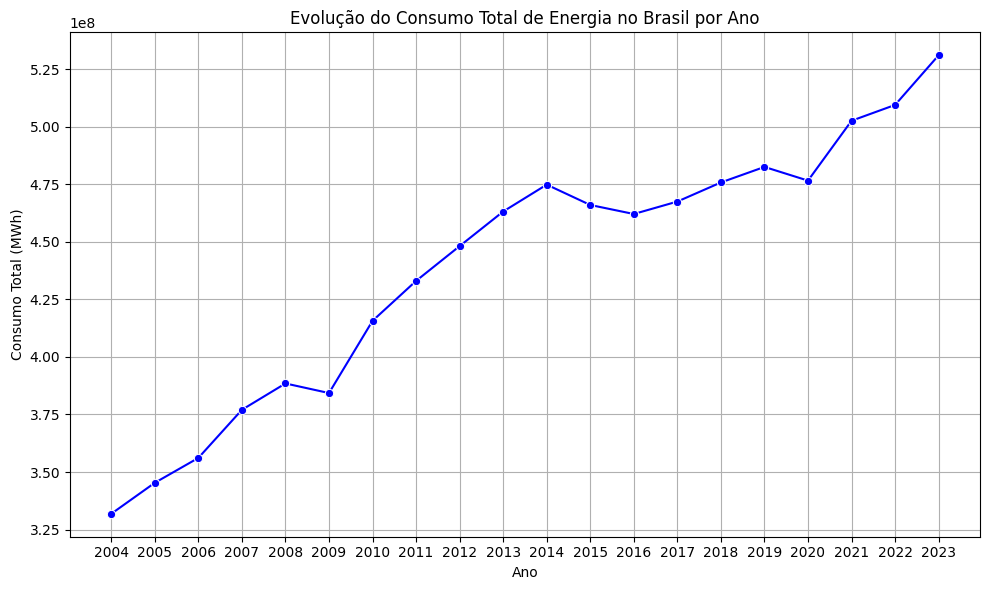

In [16]:
# Agrupa o consumo total por ano
df_consumo_anual = df_final.groupby('ano')['consumo'].sum().reset_index()
df_consumo_anual['ano'] = df_consumo_anual['ano'].astype(str)

# Gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_consumo_anual, x='ano', y='consumo', marker='o', color='blue')

# Estética
plt.title('Evolução do Consumo Total de Energia no Brasil por Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True)
plt.tight_layout()
plt.show()

2º Comparação do consumo por região ao longo dos anos → Linha com hue='regiao' vs. ano.

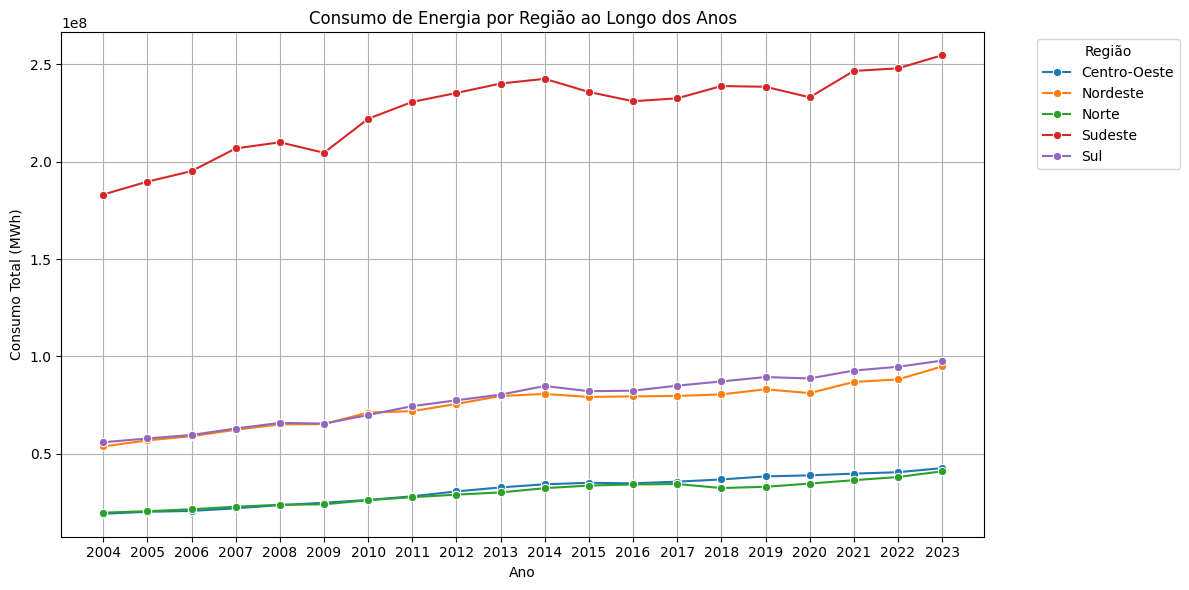

In [17]:
# Agrupa o consumo total por ano e por região
df_regiao_ano = df_final.groupby(['ano', 'regiao'])['consumo'].sum().reset_index()

# Garante que o ano seja tratado como inteiro
df_regiao_ano['ano'] = df_regiao_ano['ano'].astype(str)

# Gráfico de linha com separação por região
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_regiao_ano, x='ano', y='consumo', hue='regiao', marker='o', palette='tab10')

# Estética do gráfico
plt.title('Consumo de Energia por Região ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

3º consumo médio mensal por região, filtrado por um ano

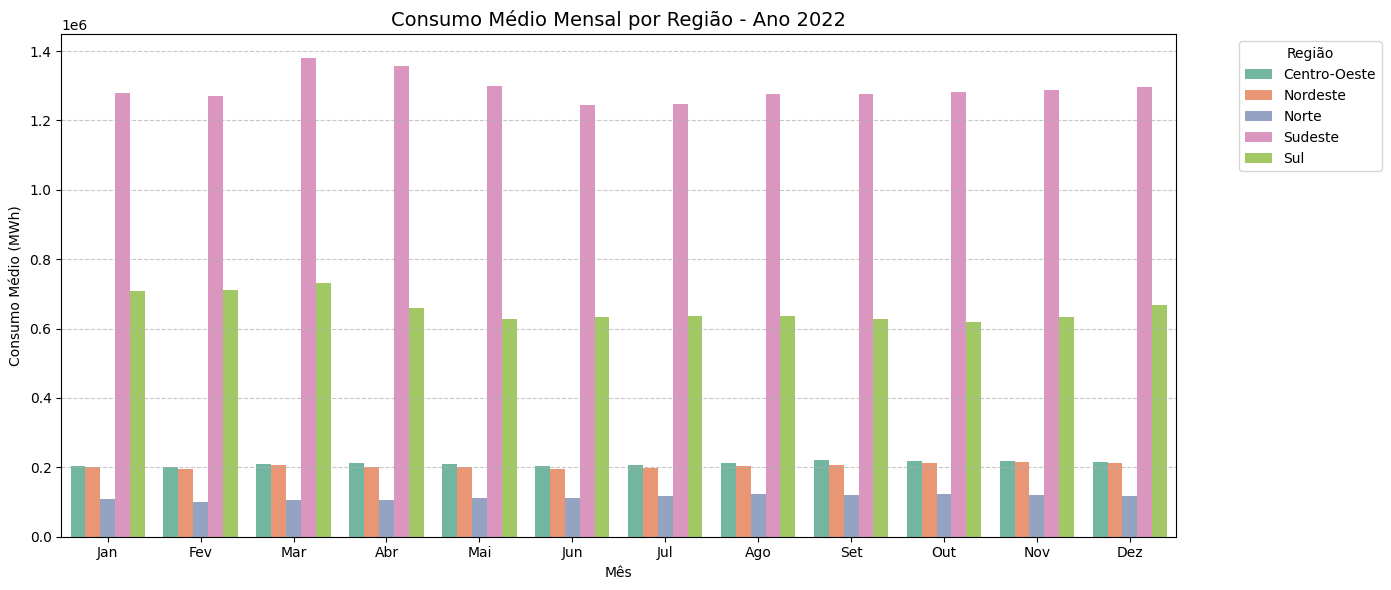

In [18]:
# Define o ano desejado 
ano_escolhido = 2022

# Filtra os dados apenas para o ano escolhido
df_ano = df_final[df_final['ano'] == ano_escolhido]

# Agrupa por mês e região, calculando o consumo médio mensal
df_consumo_mensal = df_ano.groupby(['mes', 'regiao'])['consumo'].mean().reset_index()

# Ordena os meses se forem numéricos
df_consumo_mensal = df_consumo_mensal.sort_values('mes')

# Cria o gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(data=df_consumo_mensal, x='mes', y='consumo', hue='regiao', palette='Set2')

# Adiciona estética
plt.title(f'Consumo Médio Mensal por Região - Ano {ano_escolhido}', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Consumo Médio (MWh)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* Tendência de consumo mensal por ano em uma região específica

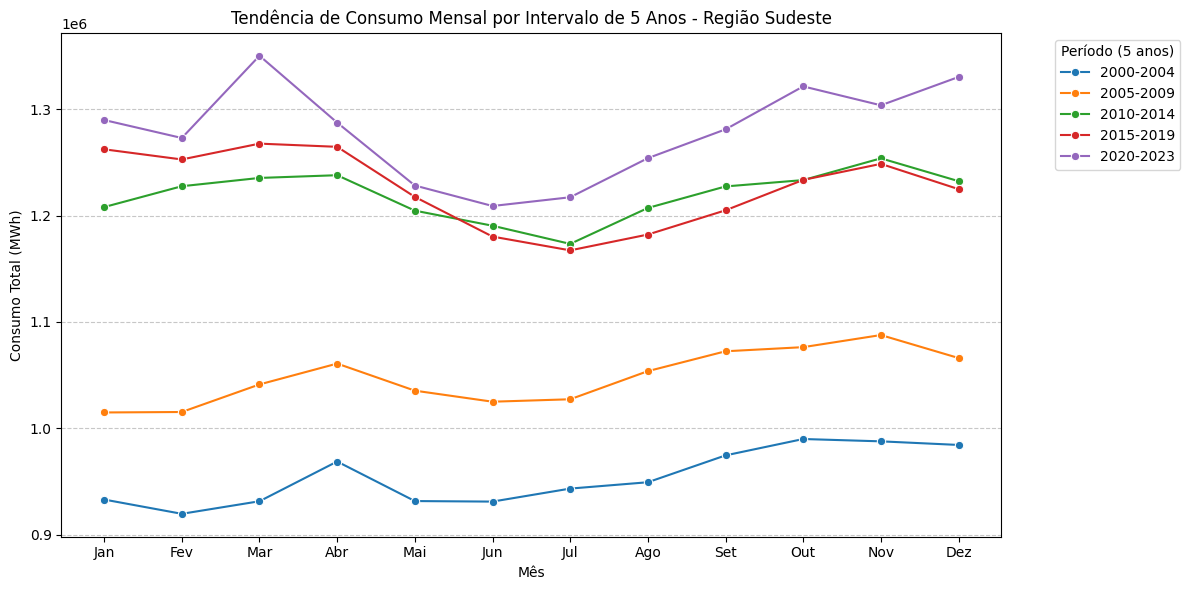

In [19]:
# Define a região desejada
regiao_escolhida = 'Sudeste'

# Filtra os dados apenas da região escolhida
df_regiao = df_final[df_final['regiao'] == regiao_escolhida].copy()

# Determina os anos mínimos e máximos reais do dataset
ano_min = df_regiao['ano'].min()
ano_max = df_regiao['ano'].max()

# Cria função para gerar rótulo de período (ex: "2000–2004")
def gerar_periodo(ano):
    inicio = (ano // 5) * 5
    fim = min(inicio + 4, ano_max)
    return f'{inicio}-{fim}'

# Aplica a função para criar a nova coluna 'periodo'
df_regiao['periodo'] = df_regiao['ano'].apply(gerar_periodo)

# Agrupa por mês e período, somando o consumo
df_mensal_periodo = df_regiao.groupby(['mes', 'periodo'])['consumo'].mean().reset_index()

# Ordena corretamente os períodos
ordem_periodos = sorted(df_mensal_periodo['periodo'].unique())
df_mensal_periodo['periodo'] = pd.Categorical(df_mensal_periodo['periodo'], categories=ordem_periodos, ordered=True)

# Gráfico de linha por período
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_mensal_periodo, x='mes', y='consumo', hue='periodo', marker='o', palette='tab10')

# Estética
plt.title(f'Tendência de Consumo Mensal por Intervalo de 5 Anos - Região {regiao_escolhida}')
plt.xlabel('Mês')
plt.ylabel('Consumo Total (MWh)')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
    'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Período (5 anos)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Consumo por tipo de consumo ao longo dos anos

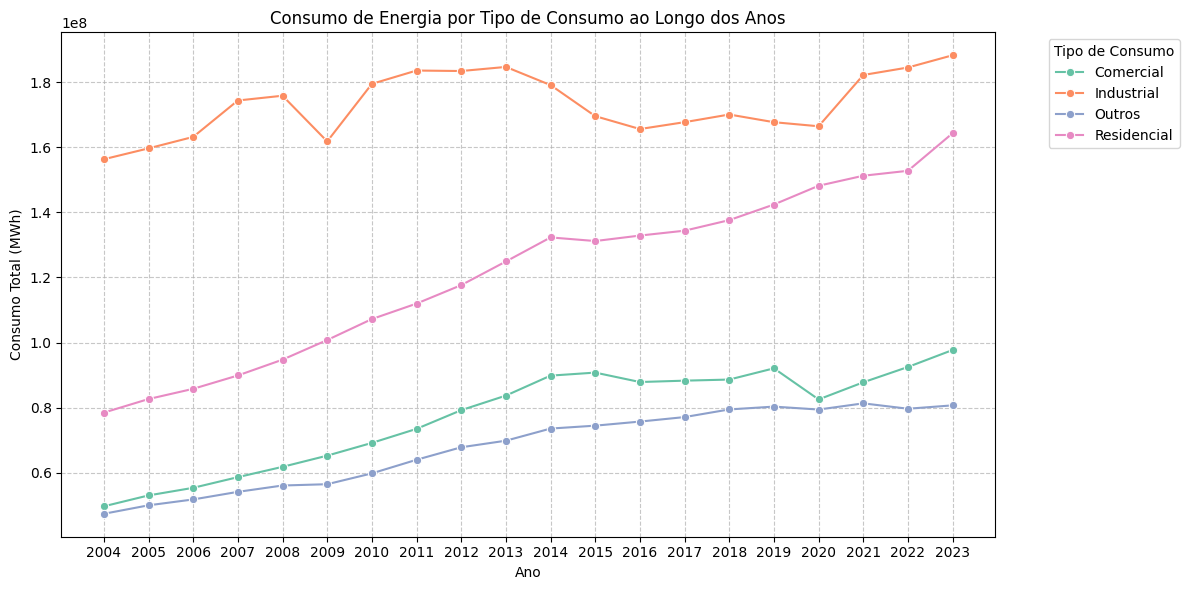

In [20]:
# Agrupa o consumo total por ano e tipo de consumo
df_tipo_ano = df_final.groupby(['ano', 'tipo_consumo'])['consumo'].sum().reset_index()

# Garante que o ano seja inteiro para evitar problemas no eixo x
df_tipo_ano['ano'] = df_tipo_ano['ano'].astype(str)

# Cria o gráfico de linha com hue para tipo de consumo
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_tipo_ano, x='ano', y='consumo', hue='tipo_consumo', marker='o', palette='Set2')
# sns.lineplot(data=df_tipo_ano, x='ano', y='consumo', hue='tipo_consumo', marker='o')

# Ajustes estéticos
plt.title('Consumo de Energia por Tipo de Consumo ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Consumo Total (MWh)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Consumo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* Distribuição do número de consumidores por Região

c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_agrupado, x='regiao', y='numero_consumidores', palette='Set2')


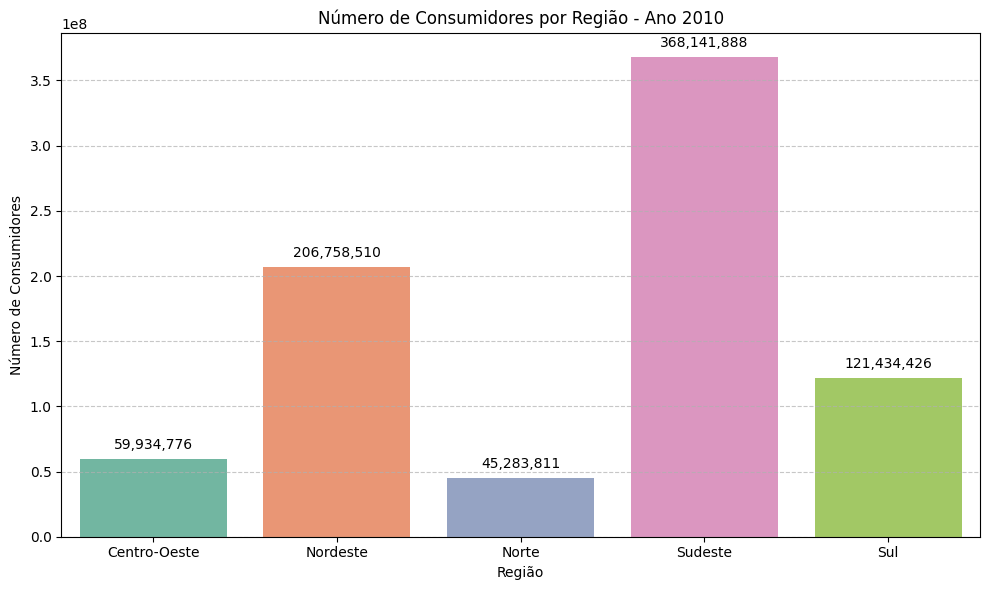

In [21]:
consumidores_por_regiao_ano(df_final, 2010)

* Correlação entre número de consumidores e consumo total por estado

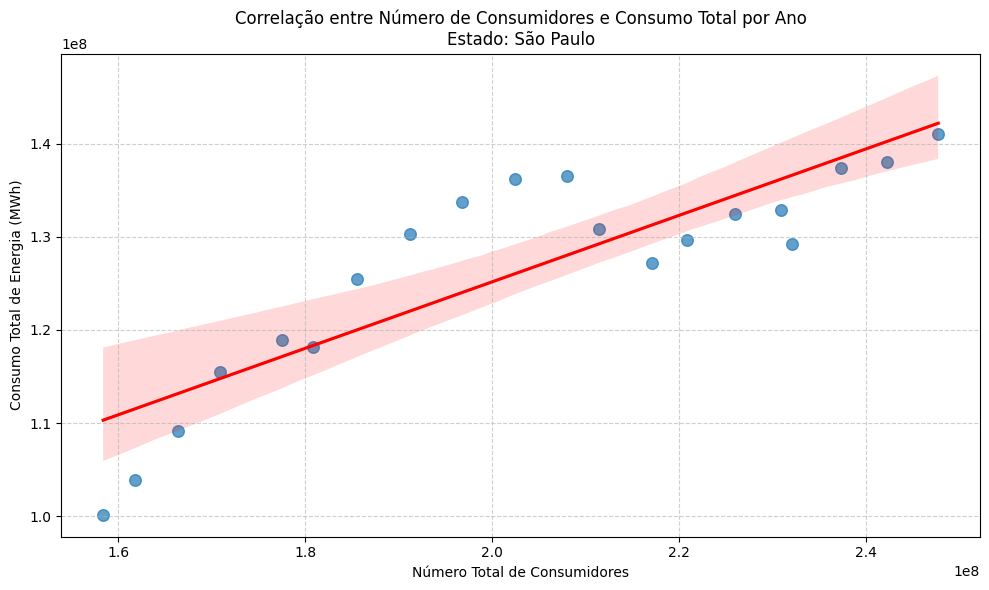

In [22]:
correlacao_consumo_consumidores_por_estado(df_final, 'São Paulo')

* Detecção de outliers no consumo por estado e ano (usando IQR)

Foram encontrados 1153 outliers no consumo.
       ano  mes sigla_uf tipo_consumo  numero_consumidores  consumo  \
0     2020    9       AC  Residencial             224272.0    51911   
1     2020   10       AC  Residencial             224610.0    51275   
2     2020   11       AC  Residencial             224080.0    50342   
3     2020   12       AC  Residencial             225720.0    51488   
4     2021    9       AC  Residencial             226138.0    52116   
...    ...  ...      ...          ...                  ...      ...   
1148  2023    8       TO  Residencial             571344.0   109316   
1149  2023    9       TO  Residencial             571848.0   118517   
1150  2023   10       TO  Residencial             573619.0   129775   
1151  2023   11       TO  Residencial             574934.0   125628   
1152  2023   12       TO  Residencial             576079.0   119941   

      id_estado     estado regiao    pais  
0             1       Acre  Norte  Brasil  
1             1

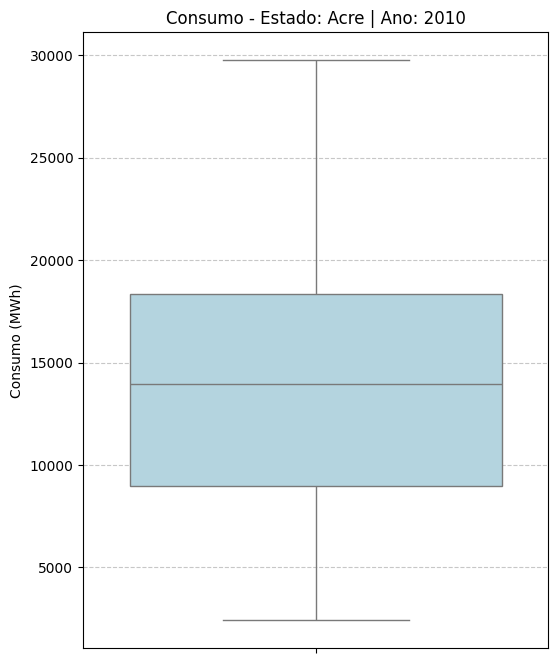

In [23]:
# Detectar outliers no dataset completo
outliers = detectar_outliers_consumo_iqr(df_final)

# Ver os outliers encontrados
print(outliers)

# Plotar boxplot com destaque para um estado e ano específico
plotar_outliers_boxplot(df_final, 'Acre', 2010)


* Os 10 estados que mais consomem energia, por intervalo de ano.


Top 10 estados que mais consumiram energia em 2015:

               estado    consumo
25          São Paulo  130814731
12       Minas Gerais   52816798
20     Rio de Janeiro   41128936
13             Paraná   29861017
19  Rio Grande do Sul   29244578
4               Bahia   24149091
23     Santa Catarina   23048727
15               Pará   19337093
8               Goiás   15030784
16         Pernambuco   13954862


c:\Users\dyego\Documents\Pos_graduacao_xp\ciencia_de_dados\Atividade_final\notebook\..\src\data_visulization\grafico.py:342: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_top10, x='estado', y='consumo', palette='mako')


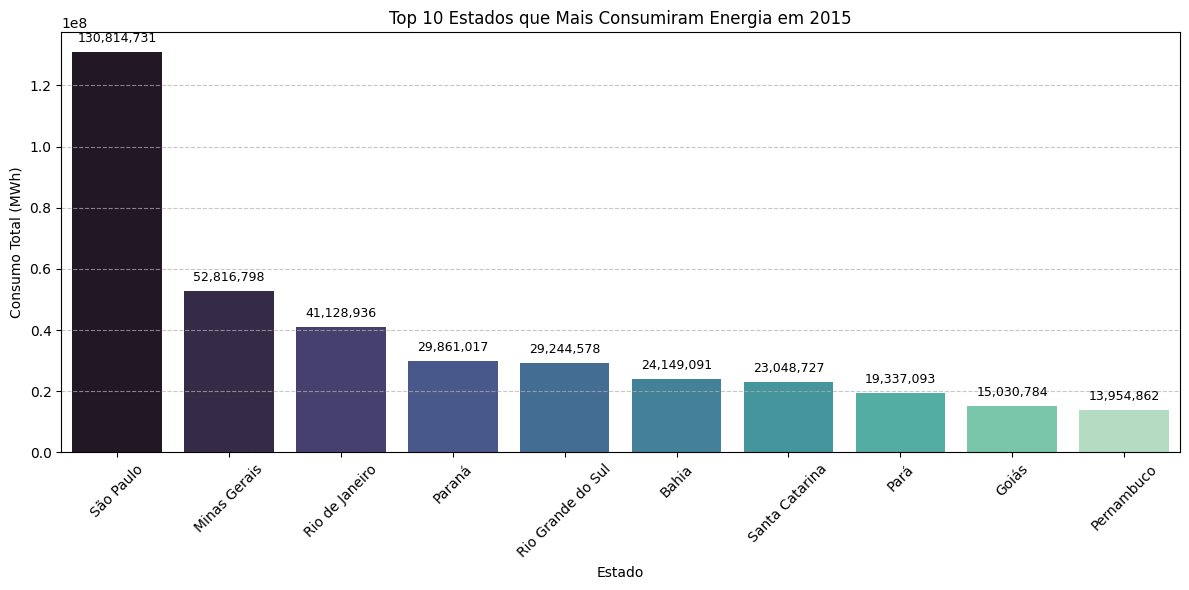

In [24]:
df_top10 = top10_consumo_estados_ano(df_final, 2015)

* Mapa de calor da correlação entre variáveis numéricas (consumo, consumidores)

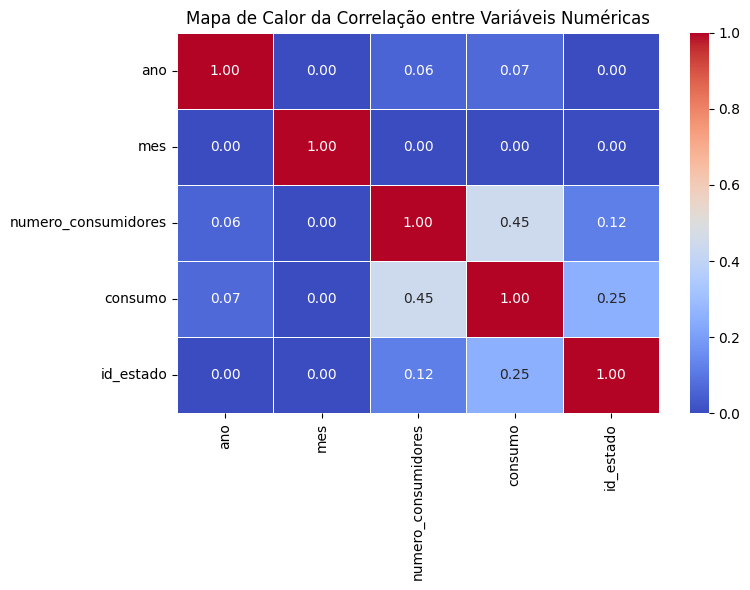

In [25]:
mapa_calor_correlacao(df_final)

#### Novo dataset para criação de novos insight com informações de PNAD - PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS 

In [35]:
tipo_encoding("../data/BRAZIL_CITIES.csv")

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [37]:
df_pnad = pd.read_csv("../data/BRAZIL_CITIES.csv", sep=';')

In [38]:
df_pnad.shape

(5573, 81)

In [39]:
df_pnad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

In [40]:
df_pnad.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


* Tratamento dos dados

In [41]:
visuliza_dados_NaN(df_pnad)

Foram detectado CITY                    0
STATE                   0
CAPITAL                 0
IBGE_RES_POP            8
IBGE_RES_POP_BRAS       8
                     ... 
Wheeled_tractor        11
UBER                 5448
MAC                  5407
WAL-MART             5471
POST_OFFICES          120
Length: 81, dtype: int64 dados NaN


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
5569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,True
5570,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,True,True,True,False
5571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False


In [42]:
# irei utilizar a mesma regra anterior irei excluir os dados faltantes
limpa_dados_NAN(df_pnad)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
631,Blumenau,SC,0,309011.0,308284.0,727.0,101157.0,96961.0,4196.0,276572.0,...,3.0,7.963977e+09,2.180564e+11,173136.0,50949.0,348.0,1.0,3.0,1.0,11.0
946,Campina Grande,PB,0,385213.0,385132.0,81.0,112024.0,107034.0,4990.0,364483.0,...,3.0,1.824991e+09,7.389713e+09,85693.0,70494.0,3.0,1.0,1.0,2.0,5.0
951,Campinas,SP,0,1080113.0,1075724.0,4389.0,348424.0,343169.0,5255.0,1004839.0,...,2.0,4.533311e+10,3.673599e+10,608817.0,131184.0,213.0,1.0,16.0,2.0,27.0
971,Campo Grande,MS,1,786797.0,785017.0,1780.0,250542.0,247159.0,3383.0,765394.0,...,3.0,9.588641e+09,1.225806e+11,302311.0,169030.0,123.0,1.0,4.0,1.0,24.0
1151,Caruaru,PE,0,314912.0,314841.0,71.0,96393.0,85887.0,10506.0,276461.0,...,3.0,1.514385e+09,4.261720e+09,69696.0,71992.0,12.0,1.0,1.0,1.0,2.0
1205,Caxias Do Sul,RS,0,435564.0,434832.0,732.0,146895.0,141700.0,5195.0,385369.0,...,3.0,6.687797e+09,6.127999e+10,212428.0,40321.0,244.0,1.0,3.0,1.0,18.0
1254,Chapecó,SC,0,183530.0,183447.0,83.0,58552.0,54542.0,4010.0,168162.0,...,3.0,3.661505e+09,7.757432e+09,96486.0,39023.0,36.0,1.0,1.0,1.0,7.0
1758,Feira De Santana,BA,0,556642.0,556393.0,249.0,163037.0,150573.0,12464.0,471066.0,...,3.0,3.229431e+09,1.066780e+10,123804.0,102281.0,18.0,1.0,1.0,1.0,7.0
1839,Foz Do Iguaçu,PR,0,256088.0,250341.0,5747.0,79263.0,78607.0,656.0,231144.0,...,2.0,1.875370e+09,9.845054e+09,113432.0,38231.0,4.0,1.0,1.0,1.0,6.0
1927,Goiânia,GO,1,1302001.0,1299718.0,2283.0,423365.0,421850.0,1515.0,1291199.0,...,3.0,2.350869e+10,8.183115e+10,618284.0,296598.0,59.0,1.0,10.0,1.0,47.0


In [43]:
visuliza_duplicados(df_pnad)

Nenhum registro duplicado encontrado.


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES


In [44]:
# Agregar BRAZIL_CITIES por UF
brazil_cities_agg = df_pnad.groupby('STATE').agg({
    'IDHM': 'mean',
    'IDHM_Renda': 'mean',
    'IDHM_Longevidade': 'mean',
    'IDHM_Educacao': 'mean',
    'IBGE_POP': 'sum',
    'GDP': 'sum',
    'GDP_CAPITA': 'mean',
    'GVA_AGROPEC': 'sum',
    'GVA_INDUSTRY': 'sum',
    'GVA_SERVICES': 'sum',
    'GVA_PUBLIC': 'sum',
    'MUN_EXPENDIT': 'sum'
}).reset_index()

In [45]:
df_pnad.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
631,Blumenau,SC,0,309011.0,308284.0,727.0,101157.0,96961.0,4196.0,276572.0,...,3.0,7.963977e+09,2.180564e+11,173136.0,50949.0,348.0,1.0,3.0,1.0,11.0
946,Campina Grande,PB,0,385213.0,385132.0,81.0,112024.0,107034.0,4990.0,364483.0,...,3.0,1.824991e+09,7.389713e+09,85693.0,70494.0,3.0,1.0,1.0,2.0,5.0
951,Campinas,SP,0,1080113.0,1075724.0,4389.0,348424.0,343169.0,5255.0,1004839.0,...,2.0,4.533311e+10,3.673599e+10,608817.0,131184.0,213.0,1.0,16.0,2.0,27.0
971,Campo Grande,MS,1,786797.0,785017.0,1780.0,250542.0,247159.0,3383.0,765394.0,...,3.0,9.588641e+09,1.225806e+11,302311.0,169030.0,123.0,1.0,4.0,1.0,24.0
1151,Caruaru,PE,0,314912.0,314841.0,71.0,96393.0,85887.0,10506.0,276461.0,...,3.0,1.514385e+09,4.261720e+09,69696.0,71992.0,12.0,1.0,1.0,1.0,2.0


In [46]:
# Renomear coluna para compatibilidade
brazil_cities_agg.rename(columns={'STATE': 'sigla_uf'}, inplace=True)

In [ ]:
# Agregar consumo por ano e UF - dataset "df_final"
consumo_agg = df_final.groupby(['ano', 'sigla_uf']).agg({
    'numero_consumidores': 'sum',
    'consumo': 'sum'
}).reset_index()

* Irei mesclar o dataset df_final com o df_pnad

In [49]:
df_final_pnad = pd.merge(consumo_agg, brazil_cities_agg, on='sigla_uf', how='inner')

In [51]:
df_final_pnad.head()

,ano,sigla_uf,numero_consumidores,consumo,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,IBGE_POP,GDP,GDP_CAPITA,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,MUN_EXPENDIT
0,2004,AL,7758590.0,3390490,0.721000,0.739000,0.799000,0.635,867156.0,21306115.95,20853.410000,164315.02,2922193.90,12006071.98,3278101.63,1.795129e+09
1,2004,BA,42981158.0,17248063,0.726333,0.725667,0.820667,0.647,2624898.0,78069608.12,19787.366667,138925.95,10963732.55,39511247.87,10197889.80,6.538658e+09
2,2004,CE,26342055.0,6328325,0.690000,0.644000,0.810000,0.642,239172.0,4185791.73,15604.190000,16226.81,446.85,2500749.36,783278.24,4.093560e+08
3,2004,GO,22229777.0,8050750,0.799000,0.824000,0.838000,0.739,1291199.0,46659222.76,32209.010000,36.55,6516.72,28379914.23,5524725.22,3.766766e+09
4,2004,MA,13735192.0,8919920,0.768000,0.741000,0.813000,0.752,942449.0,28323.36,26154.250000,21.97,5531.00,14332677.00,3297957.23,2.105900e+09


In [53]:
df_final_pnad.shape

(320, 16)

* irei salvar o dataset mesclado em CSV na propria pasta

In [55]:
df_final_pnad.to_csv("../data/dataset_mesclado_cities_consumo.csv", index=False)

* Irei realizar um analise de correlação 

In [58]:
corr = df_final_pnad[['IDHM', 'IDHM_Renda', 'GDP_CAPITA', 'consumo', 'numero_consumidores']].corr()
corr

,IDHM,IDHM_Renda,GDP_CAPITA,consumo,numero_consumidores
IDHM,1.000000,0.924829,0.623101,0.448614,0.348327
IDHM_Renda,0.924829,1.000000,0.681659,0.426973,0.343894
GDP_CAPITA,0.623101,0.681659,1.000000,0.532085,0.514596
consumo,0.448614,0.426973,0.532085,1.000000,0.980490
numero_consumidores,0.348327,0.343894,0.514596,0.980490,1.000000


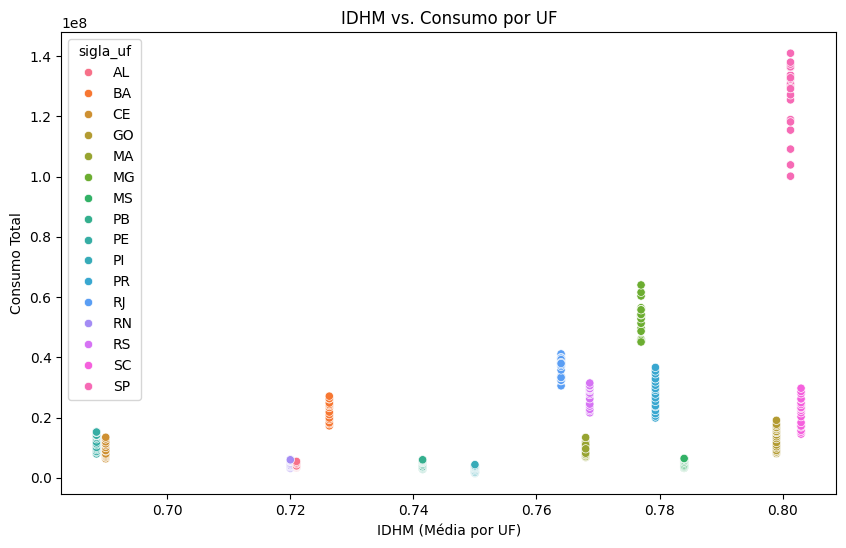

In [60]:
# Visualização: IDHM vs. Consumo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_final_pnad, x='IDHM', y='consumo', hue='sigla_uf')
plt.title('IDHM vs. Consumo por UF')
plt.xlabel('IDHM (Média por UF)')
plt.ylabel('Consumo Total')
plt.show('idhm_vs_consumo.png')
plt.close()

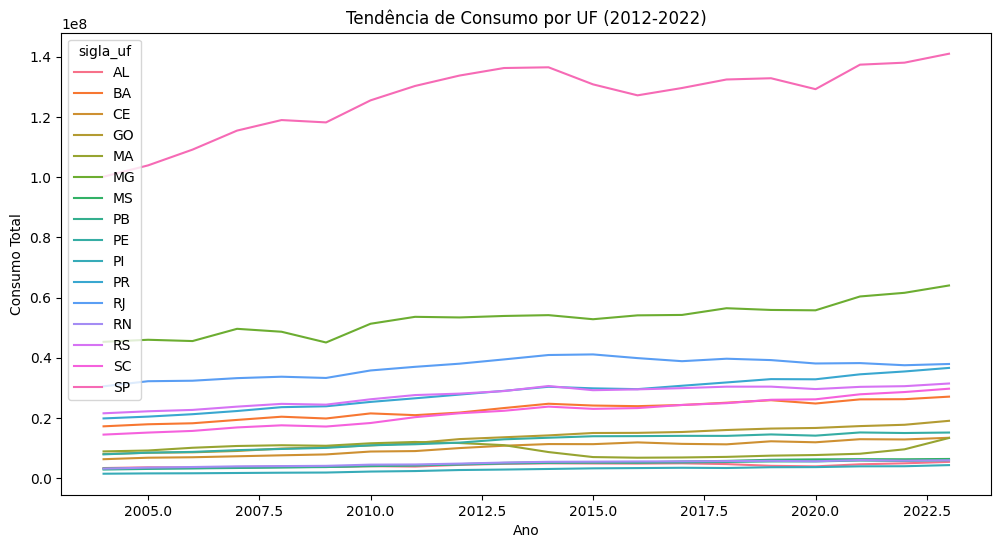

In [62]:
# Tendência de Consumo por Ano
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_final_pnad, x='ano', y='consumo', hue='sigla_uf')
plt.title('Tendência de Consumo por UF (2012-2022)')
plt.xlabel('Ano')
plt.ylabel('Consumo Total')
plt.show('tendencia_consumo_uf.png')
plt.close()

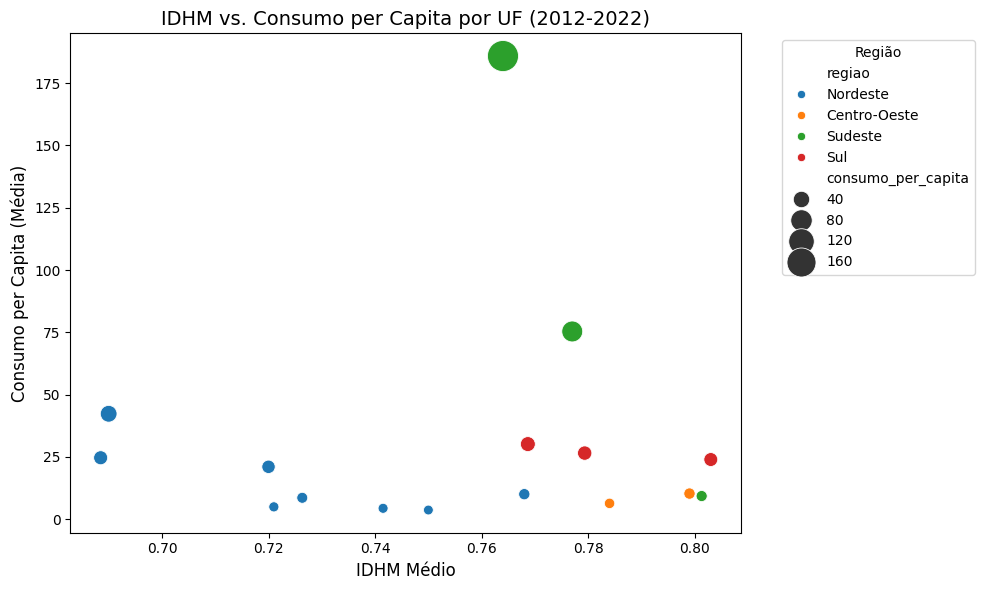

Insight 1: UFs com maior IDHM (ex.: SP, SC) apresentam maior consumo per capita, com o Sudeste e Sul destacando-se.


In [72]:

# Mapeamento de UFs para regiões
regioes = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste'
}
df_final_pnad['regiao'] = df_final_pnad['sigla_uf'].map(regioes)

# Calcular consumo per capita e agregar por UF
df_final_pnad['consumo_per_capita'] = df_final_pnad['consumo'] / df_final_pnad['IBGE_POP']
df_agg = df_final_pnad.groupby(['sigla_uf', 'regiao']).agg({
    'consumo_per_capita': 'mean',
    'IDHM': 'mean'
}).reset_index()

# Gráfico
# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='IDHM', y='consumo_per_capita', hue='regiao', size='consumo_per_capita', sizes=(50, 500))
plt.title('IDHM vs. Consumo per Capita por UF (2012-2022)', fontsize=14)
plt.xlabel('IDHM Médio', fontsize=12)
plt.ylabel('Consumo per Capita (Média)', fontsize=12)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comentário
print("Insight 1: UFs com maior IDHM (ex.: SP, SC) apresentam maior consumo per capita, com o Sudeste e Sul destacando-se.")

* Impacto no Consumo por Região
* Este gráfico de linhas mostra a tendência anual do consumo total de energia por região do Brasil entre 2012 e 2022.
O objetivo é analisar como o consumo evoluiu ao longo dos anos em cada região, identificando padrões,
quedas ou recuperações no consumo energético regional.
Destaque para a queda geral em 2020, possivelmente relacionada a eventos específicos (ex.: pandemia),
e a forma como as regiões se recuperaram nos anos seguintes.

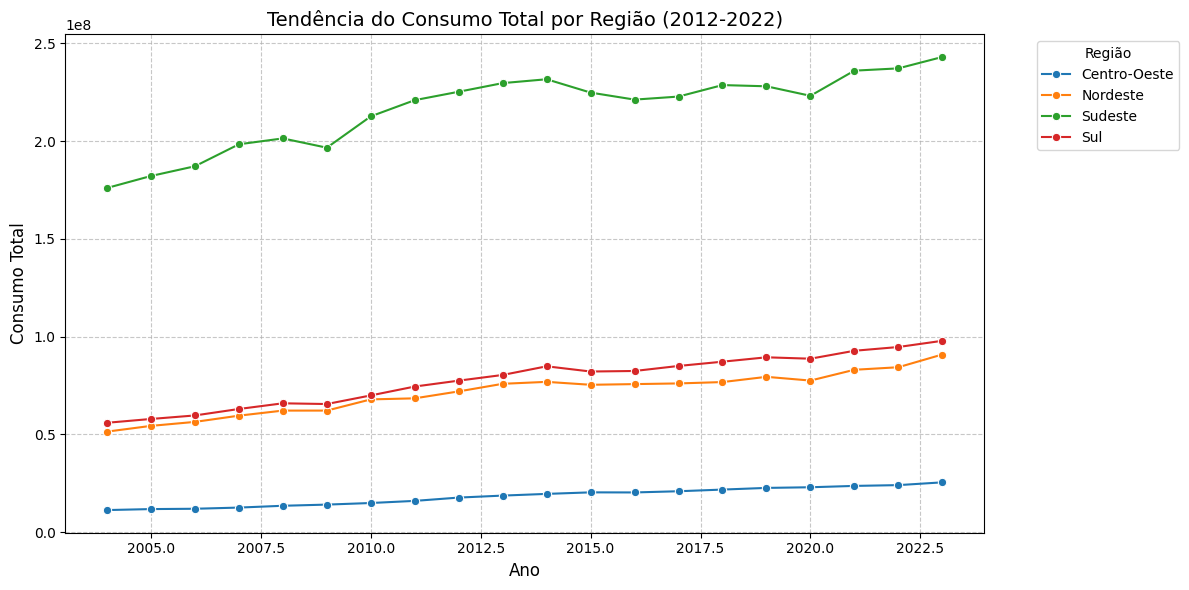

Insight 2: O consumo caiu em 2020 em todas as regiões, com maior impacto no Sudeste; a recuperação foi parcial em 2021-2022.


In [83]:
# Mapeamento de UFs para regiões
regioes = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste'
}
df_final_pnad['regiao'] = df_final_pnad['sigla_uf'].map(regioes)

# Agregar consumo por ano e região
df_agg = df_final_pnad.groupby(['ano', 'regiao']).agg({
    'consumo': 'sum'
}).reset_index()

# Gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agg, x='ano', y='consumo', hue='regiao', marker='o')
plt.title('Tendência do Consumo Total por Região (2012-2022)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Consumo Total', fontsize=12)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Comentário
print("Insight 2: O consumo caiu em 2020 em todas as regiões, com maior impacto no Sudeste; a recuperação foi parcial em 2021-2022.")

* Consumo vs. PIB per Capita
* Este gráfico de dispersão tem como objetivo analisar a relação entre o PIB per capita médio (GDP_CAPITA)
e o consumo total de energia elétrica por Unidade da Federação (UF), no período de 2012 a 2022.
A cor dos pontos indica a região geográfica de cada UF e o tamanho dos pontos representa o volume total de consumo.
O gráfico busca identificar se há uma correlação entre maior renda per capita e maior consumo de energia,
além de destacar disparidades regionais e possíveis outliers — como estados com alto consumo, mas menor PIB per capita.

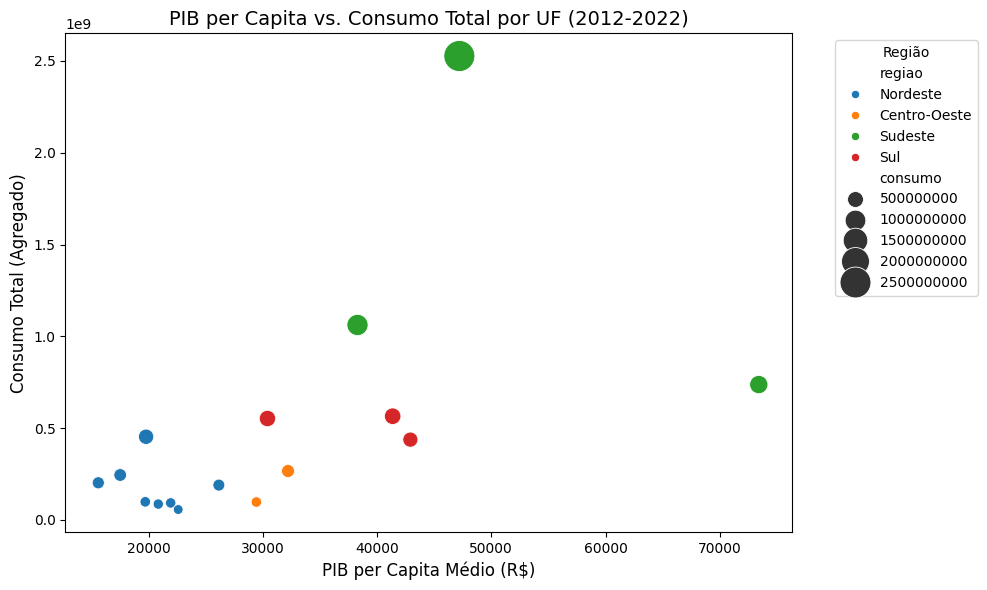

Insight 3: UFs com maior PIB per capita (ex.: DF, SP) tendem a ter maior consumo, com possíveis outliers como AM.


In [82]:
# Mapeamento de UFs para regiões
regioes = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste'
}
df_final_pnad['regiao'] = df_final_pnad['sigla_uf'].map(regioes)

# Agregar consumo total por UF
df_agg = df_final_pnad.groupby(['sigla_uf', 'regiao']).agg({
    'consumo': 'sum',
    'GDP_CAPITA': 'mean'
}).reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='GDP_CAPITA', y='consumo', hue='regiao', size='consumo', sizes=(50, 500))
plt.title('PIB per Capita vs. Consumo Total por UF (2012-2022)', fontsize=14)
plt.xlabel('PIB per Capita Médio (R$)', fontsize=12)
plt.ylabel('Consumo Total (Agregado)', fontsize=12)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comentário
print("Insight 3: UFs com maior PIB per capita (ex.: DF, SP) tendem a ter maior consumo, com possíveis outliers como AM.")

* Contribuição do Setor de Serviços para o Número de Consumidores
* Objetivo do gráfico: Este gráfico de dispersão visa analisar a relação entre o valor agregado bruto dos serviços (GVA_SERVICES)
e o número total de consumidores de energia elétrica por Unidade da Federação (UF).
Além disso, o gráfico representa visualmente o IDHM (Índice de Desenvolvimento Humano Municipal) através do tamanho dos pontos,
e a região geográfica (Norte, Nordeste, etc.) pela cor dos pontos.
O objetivo é identificar se estados com maior atividade econômica no setor de serviços também concentram
maior número de consumidores e melhores índices de desenvolvimento humano, permitindo observar padrões regionais
e socioeconômicos entre os estados brasileiros.

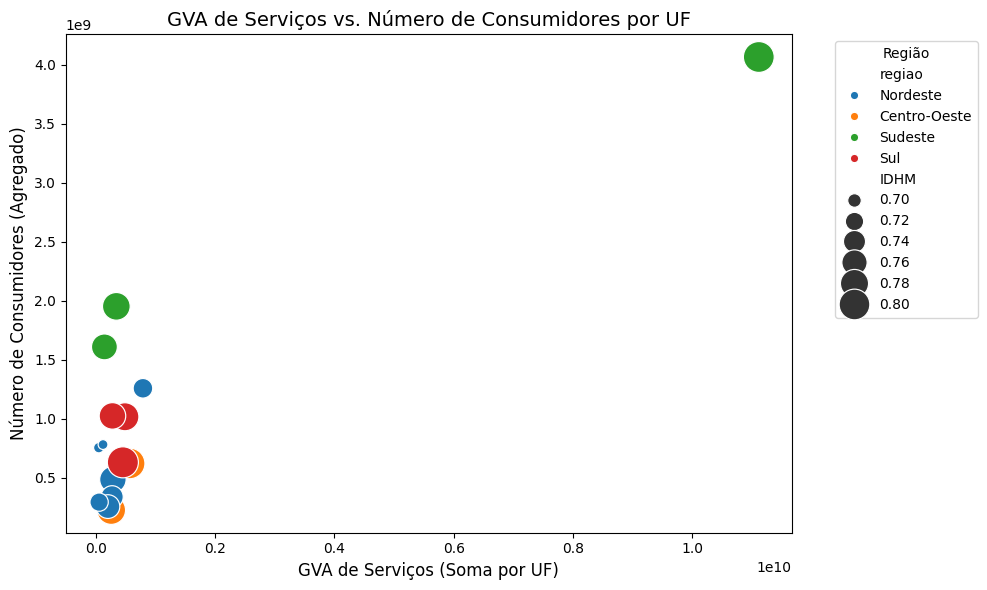

Insight 4: UFs com maior GVA de serviços (ex.: SP, RJ) têm mais consumidores, refletindo economias urbanas.


In [80]:
# Mapeamento de UFs para regiões
regioes = {
    'AC': 'Norte', 'AM': 'Norte', 'AP': 'Norte', 'PA': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'TO': 'Norte',
    'AL': 'Nordeste', 'BA': 'Nordeste', 'CE': 'Nordeste', 'MA': 'Nordeste', 'PB': 'Nordeste', 'PE': 'Nordeste', 
    'PI': 'Nordeste', 'RN': 'Nordeste', 'SE': 'Nordeste',
    'ES': 'Sudeste', 'MG': 'Sudeste', 'RJ': 'Sudeste', 'SP': 'Sudeste',
    'PR': 'Sul', 'RS': 'Sul', 'SC': 'Sul',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MT': 'Centro-Oeste'
}
df_final_pnad['regiao'] = df_final_pnad['sigla_uf'].map(regioes)

# Agregar numero_consumidores e GVA_SERVICES por UF
df_agg = df_final_pnad.groupby(['sigla_uf', 'regiao']).agg({
    'numero_consumidores': 'sum',
    'GVA_SERVICES': 'sum',
    'IDHM': 'mean'
}).reset_index()

# Gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_agg, x='GVA_SERVICES', y='numero_consumidores', hue='regiao', size='IDHM', sizes=(50, 500))
plt.title('GVA de Serviços vs. Número de Consumidores por UF', fontsize=14)
plt.xlabel('GVA de Serviços (Soma por UF)', fontsize=12)
plt.ylabel('Número de Consumidores (Agregado)', fontsize=12)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comentário
print("Insight 4: UFs com maior GVA de serviços (ex.: SP, RJ) têm mais consumidores, refletindo economias urbanas.")

* Top UFs por Consumo e Gastos Municipais

* O objetivo do gráfico é identificar as 10 Unidades Federativas (UFs) com maior consumo total de energia no Brasil entre 2012 e 2022, e comparar esse consumo com os respectivos gastos municipais (MUN_EXPENDIT) no mesmo período. Além de segmentar as UFs por região geográfica, o gráfico permite visualizar diferenciais regionais no consumo de energia e nos investimentos públicos municipais, oferecendo insights sobre a relação entre demanda energética e o volume de recursos públicos gastos.

TypeError: type str doesn't define __round__ method

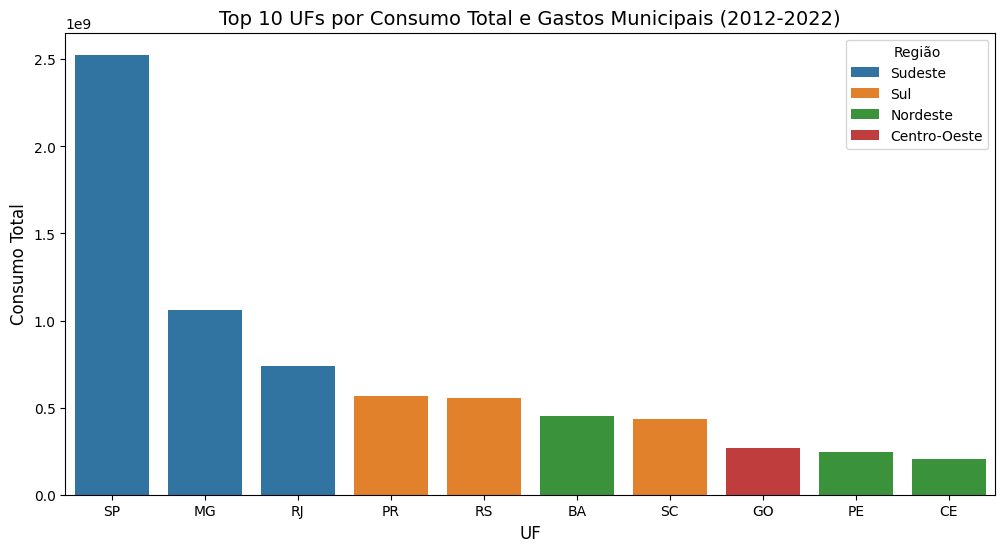

In [ ]:
# Agregar consumo e gastos municipais por UF
df_agg = df_final_pnad.groupby(['sigla_uf', 'regiao']).agg({
    'consumo': 'sum',
    'MUN_EXPENDIT': 'sum'
}).reset_index()

# Selecionar as 10 UFs com maior consumo
top_10 = df_agg.nlargest(10, 'consumo')

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10, x='sigla_uf', y='consumo', hue='regiao')
plt.title('Top 10 UFs por Consumo Total e Gastos Municipais (2012-2022)', fontsize=14)
plt.xlabel('UF', fontsize=12)
plt.ylabel('Consumo Total', fontsize=12)
plt.legend(title='Região')

# Adicionar anotações corretamente alinhadas às barras
for bar, gasto in zip(ax.patches, top_10['MUN_EXPENDIT']):
    altura = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(x_pos, altura, f"{int(gasto / 1e6)}M", 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Comentário
print("Insight 5: UFs com maior consumo (ex.: SP, RJ) também têm altos gastos municipais, indicando maior investimento público.")